# 3.1 视图

我们先来看一个查询语句

```sql
SELECT stu_name FROM view_students_info;
```
单从表面上看起来这个语句是和正常的从数据表中查询数据是完全相同的，但其实我们操作的是一个视图。所以从SQL的角度来说操作视图与操作表看起来是完全相同的，那么为什么还会有视图的存在呢？视图到底是什么？视图与表有什么不同呢？

## 3.1.1 什么是视图

视图是一个虚拟的表，不同于直接操作数据表，视图是依据SELECT语句来创建的（会在下面具体介绍），所以操作视图时会根据创建视图的SELECT语句生成一张虚拟表，然后在这张虚拟表上做SQL操作。

## 3.1.2 视图与表有什么区别

《*sql**基础**教程**第2版*》用一句话非常凝练的概括了视图与表的区别---“是否保存了实际的数据”。所以视图并不是数据库真实存储的数据表，它可以看作是一个窗口，通过这个窗口我们可以看到数据库表中真实存在的数据。所以我们要区别视图和数据表的本质，即视图是基于真实表的一张虚拟的表，其数据来源均建立在真实表的基础上。
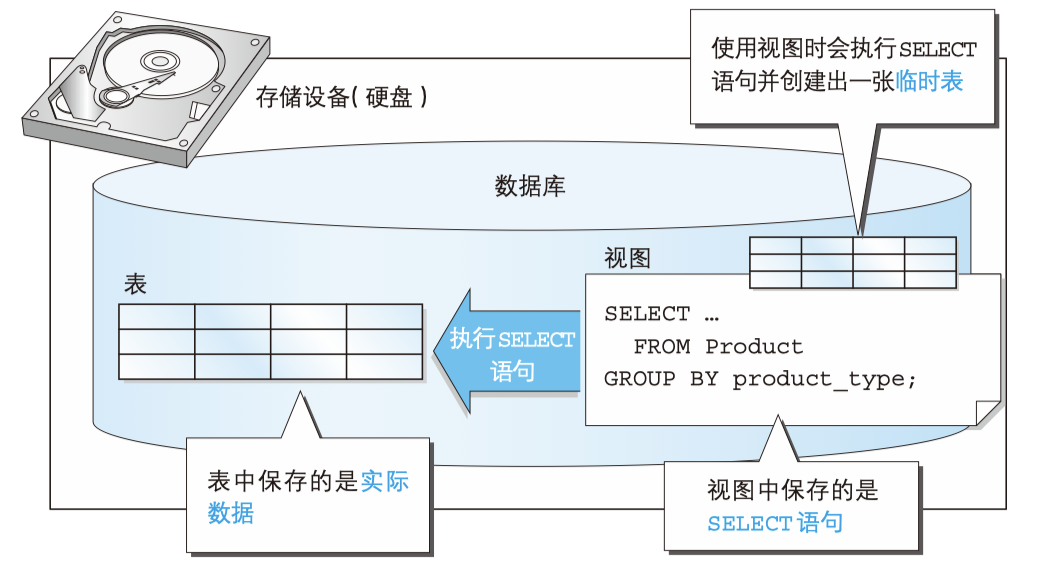

*图片来源：《sql基础教程第2版》*

下面这句顺口溜也方便大家记忆视图与表的关系：“视图不是表，视图是虚表，视图依赖于表”。

## 3.1.3 为什么会存在视图

那既然已经有数据表了，为什么还需要视图呢？主要有以下几点原因：

1. 通过定义视图可以将频繁使用的SELECT语句保存以提高效率。
2. 通过定义视图可以使用户看到的数据更加清晰。
3. 通过定义视图可以不对外公开数据表全部字段，增强数据的保密性。
4. 通过定义视图可以降低数据的冗余。
## 3.1.4 如何创建视图

说了这么多视图与表的区别，下面我们就一起来看一下如何创建视图吧。

创建视图的基本语法如下：

```sql
CREATE VIEW <视图名称>(<列名1>,<列名2>,...) AS <SELECT语句>
```
其中SELECT 语句需要书写在 AS 关键字之后。 SELECT 语句中列的排列顺序和视图中列的排列顺序相同， SELECT 语句中的第 1 列就是视图中的第 1 列， SELECT 语句中的第 2 列就是视图中的第 2 列，以此类推。而且视图的列名是在视图名称之后的列表中定义的。
需要注意的是视图名在数据库中需要是唯一的，不能与其他视图和表重名。

视图不仅可以基于真实表，我们也可以在视图的基础上继续创建视图。

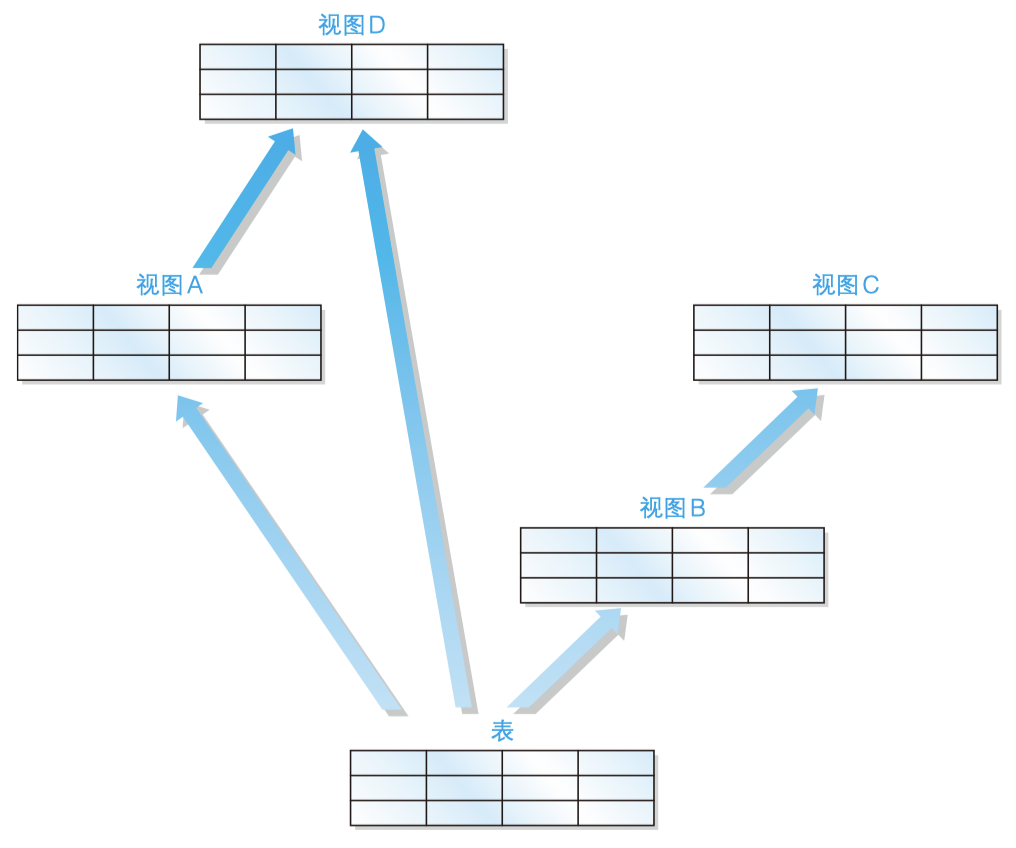

*图片来源：《sql基础教程第2版》*

虽然在视图上继续创建视图的语法没有错误，但是我们还是应该尽量避免这种操作。这是因为对多数 DBMS 来说， 多重视图会降低 SQL 的性能。

* 注意事项

需要注意的是在一般的DBMS中定义视图时不能使用ORDER BY语句。下面这样定义视图是错误的。

```sql
CREATE VIEW productsum (product_type, cnt_product)
AS
SELECT product_type, COUNT(*)
  FROM product
 GROUP BY product_type
 ORDER BY product_type;
```
为什么不能使用 ORDER BY 子句呢？这是因为视图和表一样，**数据行都是没有顺序的**。

*在 MySQL中视图的定义是允许使用 ORDER BY 语句的，但是若从特定视图进行选择，而该视图使用了自己的 ORDER BY 语句，则视图定义中的 ORDER BY 将被忽略。*

* 基于单表的视图

我们在product表的基础上创建一个视图，如下：

```sql
CREATE VIEW productsum (product_type, cnt_product)
AS
SELECT product_type, COUNT(*)
  FROM product
 GROUP BY product_type ;
```
创建的视图如下图所示：

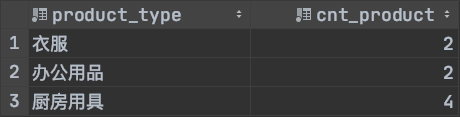


* 基于多表的视图

我们在product表和shop_product表的基础上创建视图。

```sql
CREATE VIEW view_shop_product(product_type, sale_price, shop_name)
AS
SELECT product_type, sale_price, shop_name
  FROM product,
       shop_product
 WHERE product.product_id = shop_product.product_id;
```
创建的视图如下图所示

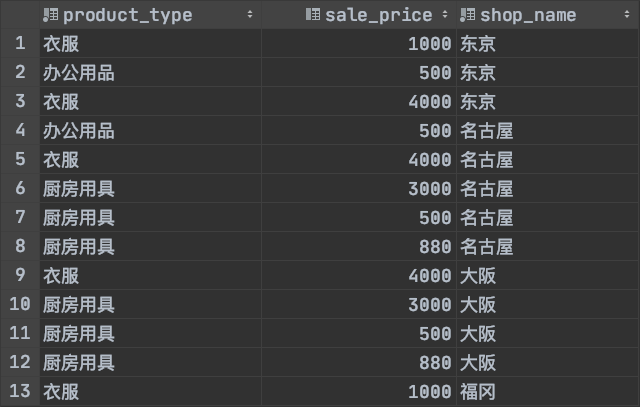


我们可以在这个视图的基础上进行查询

```sql
SELECT sale_price, shop_name
  FROM view_shop_product
 WHERE product_type = '衣服';
```
查询结果为：

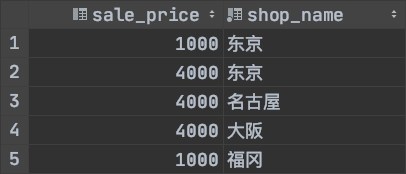

## 3.1.5 如何修改视图结构

修改视图结构的基本语法如下：

```sql
ALTER VIEW <视图名> AS <SELECT语句>
```
其中视图名在数据库中需要是唯一的，不能与其他视图和表重名。
当然也可以通过将当前视图删除然后重新创建的方式达到修改的效果。（对于数据库底层是不是也是这样操作的呢，你可以自己探索一下。）

* 修改视图

我们修改上方的productSum视图为

```sql
ALTER VIEW productSum
    AS
        SELECT product_type, sale_price
          FROM Product
         WHERE regist_date > '2009-09-11';
```
此时productSum视图内容如下图所示

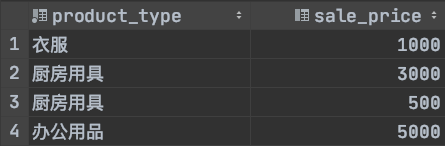


## 3.1.6 如何更新视图内容

因为视图是一个虚拟表，所以对视图的操作就是对底层基础表的操作，所以在修改时只有满足底层基本表的定义才能成功修改。

对于一个视图来说，如果包含以下结构的任意一种都是不可以被更新的：

* 聚合函数 SUM()、MIN()、MAX()、COUNT() 等。
* DISTINCT 关键字。
* GROUP BY 子句。
* HAVING 子句。
* UNION 或 UNION ALL 运算符。
* FROM 子句中包含多个表。

视图归根结底还是从表派生出来的，因此，如果原表可以更新，那么 视图中的数据也可以更新。反之亦然，如果视图发生了改变，而原表没有进行相应更新的话，就无法保证数据的一致性了。

* 更新视图

因为我们刚刚修改的productSum视图不包括以上的限制条件，我们来尝试更新一下视图

```sql
UPDATE productsum
   SET sale_price = '5000'
 WHERE product_type = '办公用品';
```
此时我们再查看productSum视图，可以发现数据已经更新了

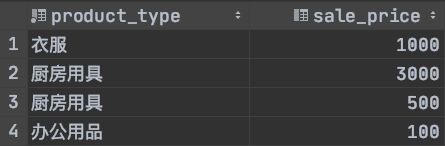

此时观察原表也可以发现数据也被更新了
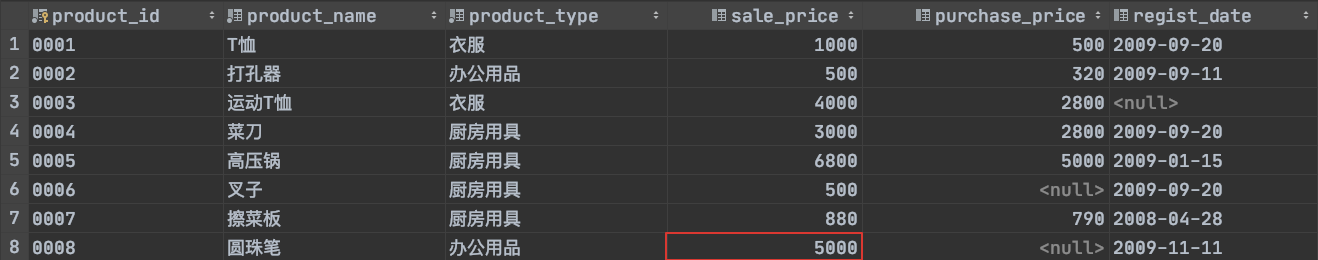


不知道大家看到这个结果会不会有疑问，刚才修改视图的时候是设置product_type='办公用品'的商品的sale_price=5000，为什么原表的数据只有一条做了修改呢？

还是因为视图的定义，视图只是原表的一个窗口，所以它修改也只能修改透过窗口能看到的内容。

**注意：这里虽然修改成功了，但是并不推荐这种使用方式。而且我们在创建视图时也尽量使用限制不允许通过视图来修改表**

## 3.1.7 如何删除视图

删除视图的基本语法如下：

```sql
DROP VIEW <视图名1> [ , <视图名2> …]
```
注意：需要有相应的权限才能成功删除。
* 删除视图

我们删除刚才创建的productSum视图

```sql
DROP VIEW productSum;
```
如果我们继续操作这个视图的话就会提示当前操作的内容不存在。

## 3.2及以下 暂略，后补

## 练习题

### 3.1 
```CREATE VIEW ViewPractice5_1
    AS
SELECT product_name,sale_price,regist_data
  FROM product
 WHERE sale_price >= 1000 AND regist_data = '2009-9-20';```

### 3.2
error，表中并未引用的字段，在没有指定取值的情况下无法填充数据。

### 3.3
```SELECT product_id
	   ,product_name,product_type
	   ,sale_price
       ,(SELECT AVG(sale_price) 
		   FROM product) AS sale_price_all
FROM product;```

### 3.4
```SELECT product_id
			 ,product_name
			 ,product_type
			 ,(SELECT AVG(sale_price)
					 FROM product AS product2
				  WHERE product2.product_type = product1.product_type) AS sale_price
  FROM product AS product1;```

### 3.5
False

### 3.6
```SELECT product_name, purchase_price
  FROM product
 WHERE purchase_price NOT IN (500, 2800, 5000);

SELECT product_name, purchase_price
  FROM product
 WHERE purchase_price NOT IN (500, 2800, 5000, NULL);```

### 3.7
